In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

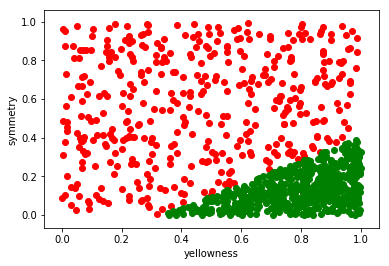

In [2]:
%matplotlib inline
data = np.loadtxt(r'C:\Users\Irka\web\jup\NeuralNetworksStepik-master\hw_1/data.csv', delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

In [5]:
class Perceptron:
    def __init__(self, w, b):
        """ініціалізація класу перцептрон
        w - вектор вагів розміром (m, 1), m - кількість зміних,
        b - число (похибка)
        """
        self.w = w
        self.b = b
        
    def forward_pass(self, single_input):
        """метод вираховує відповідь перцептрона при наданні даних single_input - вектор 
        прикладу розміром (m, 1),
        метод повертає число (1, 0), або boolean (True/False).
        """
        
        result = 0
        for i in range(self.w):
            result += self.w[i] * single_input[i]
            
        if result > 0:
            return True
        else:
            return False
        
    def vectorized_forward_pass(self, input_matrix):
        """метод вираховує відповідь перцептрона при наданні набору прикладів
        input_matrix - матриця прикладів розміром (n, m), кожна стрічка - окремий приклад,
        n - кількість прикладів, m - кількість змінних.
        Повуртає вертикальний приклад з відповідями перцептрона 
        (елементи вектора (0,1), або boolean)
        """
        
        #перемножфємо матрицю і додаємо зміщення (похибку)
        sum_vector_matrix = input_matrix.dot(self.w) + self.b
        #якщо для і-го прикладу добуток вагів на вхідні параметри признаків + зміщення > 0, 
        #то алгоритм вгадав з відповідю то в активаційну матрицю записумо 1, якщо ні - 0
        activation_vector_matrix = sum_vector_matrix > 0
        return activation_vector_matrix
    
    def train_on_single_example(self, example, y):
        """
        приймає вектор активації входів example (m, 1)
        і правильну відповідь для нього у (число 0 або 1, або boolean)
        обновляє значення вагів перцептрона у відповідності до прикладів
        і повертає розмір помилки, яка відбулася на цьому прикладі до зміни вагів
        """
        y_caps = self.vectorized_forward_pass(example.T)
        error = y - y_caps[0,0]
        self.w += error*example
        self.b += error
        return abs(error)
    
    def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        """
        input_matrix - матриця входів розміру (n, m),
        y - вектор правильних відповідей (n, 1) (y[i] - правильна відповідь на приклад input_matrix[i]),
        max_steps - максимальна кількість кроків.
        Застосовуємо train_on_single_example, поки не будемо помилятися або до закінчення терпіння.
        Константа max_steps - наше терпіння.
        """
        
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size,1))
                error = self.train_on_single_example(example, answer)
                errors += int(error)

In [6]:
def create_perceptron(m):
    """Створюємо перцептрон з випадковими вагами і m входами"""
    w = np.random.random((m, 1))
    return Perceptron(w, 1)

In [7]:
def plot_line(coefs):
    """
    Малюємо роздяляючу пряму, яка відповідає вагам, переданим в coefs = (weights, bias), 
    де weights - ndarray форми (2, 1), bias - число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [8]:
def step_by_step_weights(p, input_matrix, y, max_steps=1e6):
    """
    навчаємо перцептрон послідовно на кожній стрічці вхідних даних,
    повертає оновлені ваги при кожній їхній зміні
    p - объект класа Perceptron
    """
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error  
            if error:  
                yield p.w, p.b
                
    for _ in range(20):
        yield p.w, p.b

In [9]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    навчає перцептрон послідовно на кожній стрічці вхідних даних,
    на кожному кроці запамятовує кількість неправильно класифікованих прикладів
    і повертає список із цих кількостей
    """
    def count_errors():
        return np.abs(p.vectorized_forward_pass(input_matrix).astype(np.int) - y).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            errors_list.append(count_errors())
    return errors_list

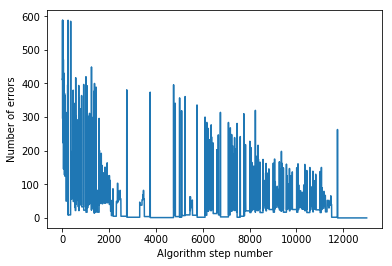

In [14]:
%matplotlib inline
perceptron_for_misclassification = create_perceptron(2)
errors_list = step_by_step_errors(perceptron_for_misclassification, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis])
plt.plot(errors_list);
plt.ylabel("Number of errors")
plt.xlabel("Algorithm step number");

In [11]:
def get_vector(p):
    """повертає вектор із всіх вагів перцептрона, взаховуючи зміщення"""
    v = np.array(list(p.w.ravel()) + [p.b])
    return v

In [12]:
def step_by_step_distances(p, ideal, input_matrix, y, max_steps=1e6):
    """навчає перцептрон р і записує кожну зміну відстані від поточних вагів ideal"""
    distances = [norm(get_vector(p) - ideal)]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            if error:
                distances.append(norm(get_vector(p) - ideal))
    return distances

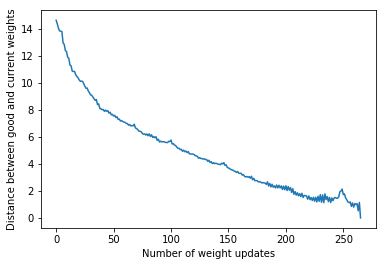

In [15]:
%matplotlib inline
np.random.seed(42)
init_weights = np.random.random_sample(3)
w, b = init_weights[:-1].reshape((2, 1)), init_weights[-1]
ideal_p = Perceptron(w.copy(), b.copy())
ideal_p.train_until_convergence(data[:, :-1], data[:, -1][:,np.newaxis])
ideal_weights = get_vector(ideal_p)

new_p = Perceptron(w.copy(), b.copy())
distances = step_by_step_distances(new_p, ideal_weights, data[:, :-1], data[:, -1][:,np.newaxis])

plt.xlabel("Number of weight updates")
plt.ylabel("Distance between good and current weights")
plt.plot(distances);